In [43]:
# import of my own data-loader
import xmlloader as xl


# import pandas for structuring the data
import pandas as pd

import xml.etree.ElementTree as ET

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [44]:
tree = ET.parse('data/xmldata.xml')
root = tree.getroot()

# Extract data from XML and create a list of dictionaries
data_list = []
for record in root.findall('.//record'):
    data_dict = {}
    for field in record.findall('.//field'):
        data_dict[field.get('name')] = field.text if field.text else None
    data_list.append(data_dict)

# Create a DataFrame
df = pd.DataFrame(data_list)

# Pivot the DataFrame
df_pivot = df.pivot(index='Year', columns=['Country or Area', 'Item'], values='Value').reset_index()

# Display the resulting DataFrame
df

,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,None
1,Zimbabwe,Access to electricity (% of population),1961,None
2,Zimbabwe,Access to electricity (% of population),1962,None
3,Zimbabwe,Access to electricity (% of population),1963,None
4,Zimbabwe,Access to electricity (% of population),1964,None
...,...,...,...,...
57,Zimbabwe,Access to electricity (% of population),2017,43.9790649414063
58,Zimbabwe,Access to electricity (% of population),2018,45.4002876281738
59,Zimbabwe,Access to electricity (% of population),2019,46.6820945739746
60,Zimbabwe,Access to electricity (% of population),2020,52.7476674999602


In [45]:
df.shape

(62, 4)

In [46]:
df.head()

,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,None
1,Zimbabwe,Access to electricity (% of population),1961,None
2,Zimbabwe,Access to electricity (% of population),1962,None
3,Zimbabwe,Access to electricity (% of population),1963,None
4,Zimbabwe,Access to electricity (% of population),1964,None


<h3>I first make sure that the table is sorted in a somewhat readable way. Thereafter i drop the key column as it isnt necessary </h3>

In [47]:
list(df)

['Country or Area', 'Item', 'Year', 'Value']

In [48]:
df.head(8)



,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,None
1,Zimbabwe,Access to electricity (% of population),1961,None
2,Zimbabwe,Access to electricity (% of population),1962,None
3,Zimbabwe,Access to electricity (% of population),1963,None
4,Zimbabwe,Access to electricity (% of population),1964,None
5,Zimbabwe,Access to electricity (% of population),1965,None
6,Zimbabwe,Access to electricity (% of population),1966,None
7,Zimbabwe,Access to electricity (% of population),1967,None


In [49]:
df.isnull().sum()

Country or Area     0
Item                0
Year                0
Value              32
dtype: int64

In [50]:
df.Value.fillna('0', inplace=True)

C:\Users\yusef\AppData\Local\Temp\ipykernel_6104\3442811693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Value.fillna('0', inplace=True)


In [51]:
df.isnull().sum()

Country or Area    0
Item               0
Year               0
Value              0
dtype: int64

In [52]:
df.head(-2)

,Country or Area,Item,Year,Value
0,Zimbabwe,Access to electricity (% of population),1960,0
1,Zimbabwe,Access to electricity (% of population),1961,0
2,Zimbabwe,Access to electricity (% of population),1962,0
3,Zimbabwe,Access to electricity (% of population),1963,0
4,Zimbabwe,Access to electricity (% of population),1964,0
5,Zimbabwe,Access to electricity (% of population),1965,0
6,Zimbabwe,Access to electricity (% of population),1966,0
7,Zimbabwe,Access to electricity (% of population),1967,0
8,Zimbabwe,Access to electricity (% of population),1968,0
9,Zimbabwe,Access to electricity (% of population),1969,0


<h4> I have now ensured that all of the empty valuefields have been replaced with 0 </h4>

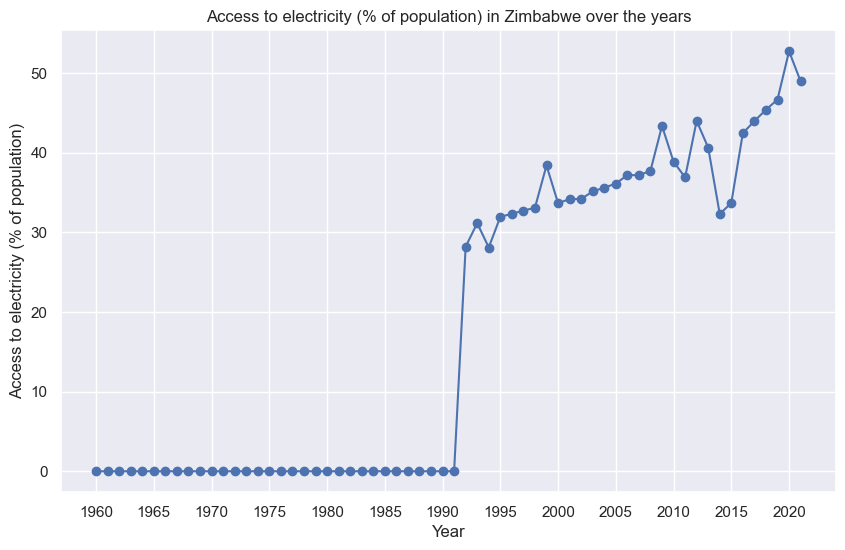

In [53]:
# Assuming you have loaded the XML data into a DataFrame named df
# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')



# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Year'],df['Value'], marker='o', linestyle='-')
plt.title('Access to electricity (% of population) in Zimbabwe over the years')
plt.xlabel('Year')
plt.ylabel('Access to electricity (% of population)')
plt.grid(True)

# Show only every 10th year on the x-axis
plt.xticks(df['Year'][::5])

plt.show()

Lets try comparing this to some other data. For this i will use my own homemade data-loader

In [54]:
#cdf == counter data frame since i will use this to compare to my main data frame
cdf = xl.XmlLoader.load_counter()

In [55]:
cdf

,Country or Area,Item,Year,Value
0,Comoros,Access to electricity (% of population),1960,None
1,Comoros,Access to electricity (% of population),1961,None
2,Comoros,Access to electricity (% of population),1962,None
3,Comoros,Access to electricity (% of population),1963,None
4,Comoros,Access to electricity (% of population),1964,None
...,...,...,...,...
57,Comoros,Access to electricity (% of population),2017,78.709831237793
58,Comoros,Access to electricity (% of population),2018,81.0197219848633
59,Comoros,Access to electricity (% of population),2019,83.3279495239258
60,Comoros,Access to electricity (% of population),2020,85.6353454589844


We can see that the data has null values on this table, or alternatively like below:

In [56]:
cdf.isnull().sum()

Country or Area     0
Item                0
Year                0
Value              36
dtype: int64

In [57]:
# Lets correct that

cdf.Value.fillna('0', inplace=True)

C:\Users\yusef\AppData\Local\Temp\ipykernel_6104\877673794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cdf.Value.fillna('0', inplace=True)


In [58]:
cdf.isnull().sum()

Country or Area    0
Item               0
Year               0
Value              0
dtype: int64

Now that we have replaced nullvalues, we can move on to comparing data!

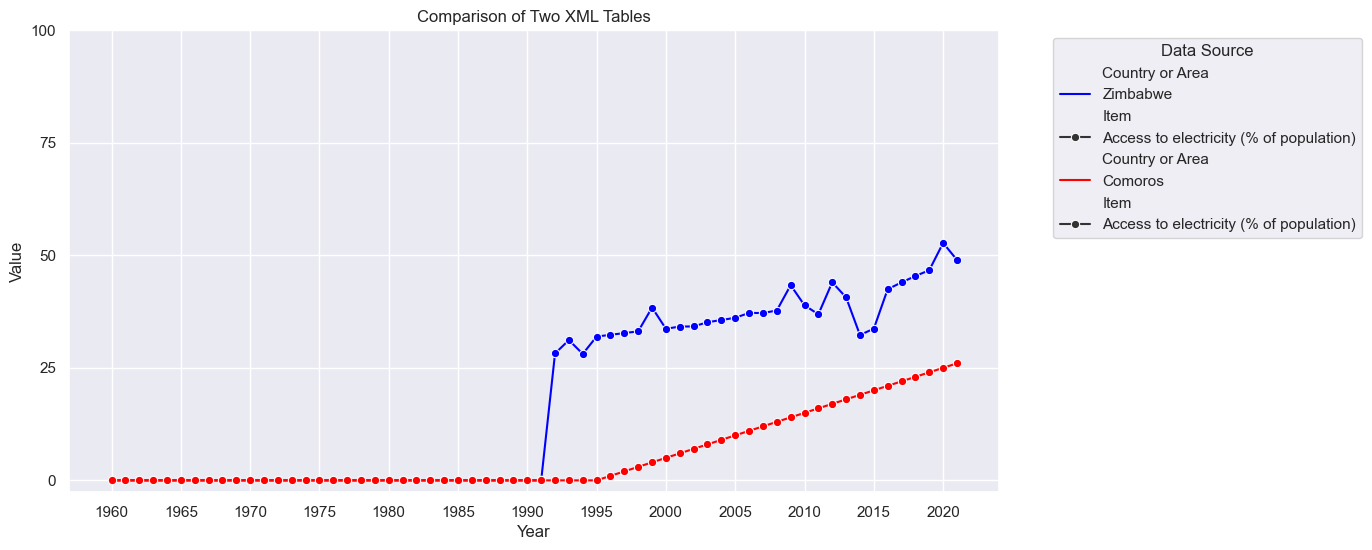

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and cdf are your DataFrames from the XML files

# Set the style for the plot
sns.set(style="darkgrid")

# Define unique colors for each Country or Area
palette = sns.color_palette("husl", n_colors=len(df['Country or Area'].unique()) + len(cdf['Country or Area'].unique()))

# Create a figure and axis
plt.figure(figsize=(12, 6))


colors = {'Zimbabwe': 'blue', 'Comoros': 'red'}


# Plot the values for the first DataFrame (in blue)
sns.lineplot(data=df, x='Year', y='Value', hue='Country or Area', style='Item', markers=True, palette=colors)

# Plot the values for the second DataFrame (in red)
sns.lineplot(data=cdf, x='Year', y='Value', hue='Country or Area', style='Item', markers=True, dashes=True, palette=colors)

plt.yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100"])

# Set plot labels and title
plt.title('Comparison of Two XML Tables')
plt.xlabel('Year')
plt.ylabel('Value')

# Show legend
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(df['Year'][::5])


plt.gca().invert_yaxis()
# Show the plot
plt.show()


We can here see how Zimbabwe skyrocketed in access to electricity while Comoros had a more steady application.